# A First Look at Norse

In [1]:
import torch
import norse
import matplotlib.pyplot as plt

In [2]:
def gauss_fcn(x, mu, sigma):
    return -(x - mu)**2 / float(2 * sigma**2)

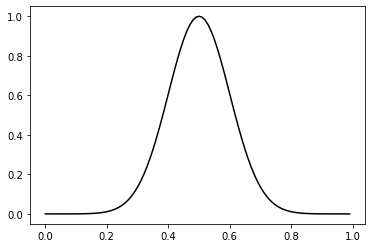

In [3]:
xs = torch.arange(0,1.0,0.01)
ys = torch.exp(gauss_fcn(xs, .5, .1))

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
gauss_plot, = ax.plot(xs, ys, color='black')

In [11]:
T = 10000
timesteps_to_ms = 1000
z = norse.functional.encode.poisson_encode(0.1*torch.exp(gauss_fcn(xs, .5, .1)), seq_length=T)
z_s = z.to_sparse()

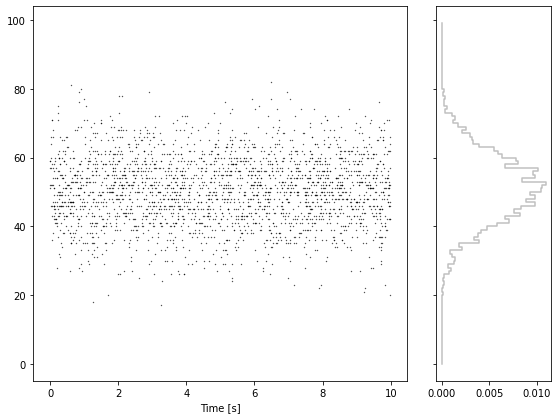

In [19]:
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.05

rect_scatter = [left, bottom, width, height]
rect_histy = [left + width + spacing, bottom, 0.2, height]
fig = plt.figure(figsize=(8, 8))
ax = fig.add_axes(rect_scatter)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

ax.scatter(z_s.indices()[0]/timesteps_to_ms, z_s.indices()[1], s=0.1, color='black')
ax_histy.step(torch.sum(z, dim=0)/T, torch.arange(0,100), color='black', alpha=0.25)
ax_histy.tick_params(axis="y", labelleft=False)
ax.set_xlabel('Time [s]')
plt.show()